Right now I'm making all types of charts on Tableau and creating the dashboard, but I need some parameters to compare the individual stats of each player, to highlight how good (or not so good) they are.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_stats.csv', encoding = 'latin-1')

In [4]:
df.columns

Index(['name', 'idevent', 'Player ID', 'event_ID', 'Kills', 'Deaths',
       'Kill / Death', 'Kill / Round', 'Rounds with kills',
       'Kill - Death difference', 'Total opening kills',
       'Total opening deaths', 'Opening kill ratio', 'Opening kill rating',
       'Team win percent after first kill', 'First kill in won rounds',
       '0 kill rounds', '1 kill rounds', '2 kill rounds', '3 kill rounds',
       '4 kill rounds', '5 kill rounds', 'Rifle kills', 'Sniper kills',
       'SMG kills', 'Pistol kills', 'Grenade', 'Other', 'nationality', 'team',
       'maps', 'rounds', 'KD-diff', 'KD', 'rating', 'event', 'Full name'],
      dtype='object')

In [5]:
normal_columns = df.columns

In [6]:
# First let's define what we are interested in, parameters that give us information:
df['Kills per map'] = df['Kills'] / df['maps']
df['Deaths per map'] = df['Deaths'] / df['maps']
df['Opening kills per map'] = df['Total opening kills'] / df['maps']
df['Opening deaths per map'] = df['Total opening deaths'] / df['maps']
df['3Ks per map'] = df['3 kill rounds'] / df['maps']
df['4Ks per map'] = df['4 kill rounds'] / df['maps']
df['5Ks per map'] = df['5 kill rounds'] / df['maps']
df['Sniper kills per map'] = df['Sniper kills'] / df['maps']
df['Rifle kills per map'] = df['Rifle kills'] / df['maps']
df['SMG kills per map'] = df['SMG kills'] / df['maps']
df['Pistol kills per map'] = df['Pistol kills'] / df['maps']
df['Grenade kills per map'] = df['Grenade'] / df['maps']
df['Other kills per map'] = df['Other'] / df['maps']

new_columns = [column for column in df.columns if column not in normal_columns] # big brain moment

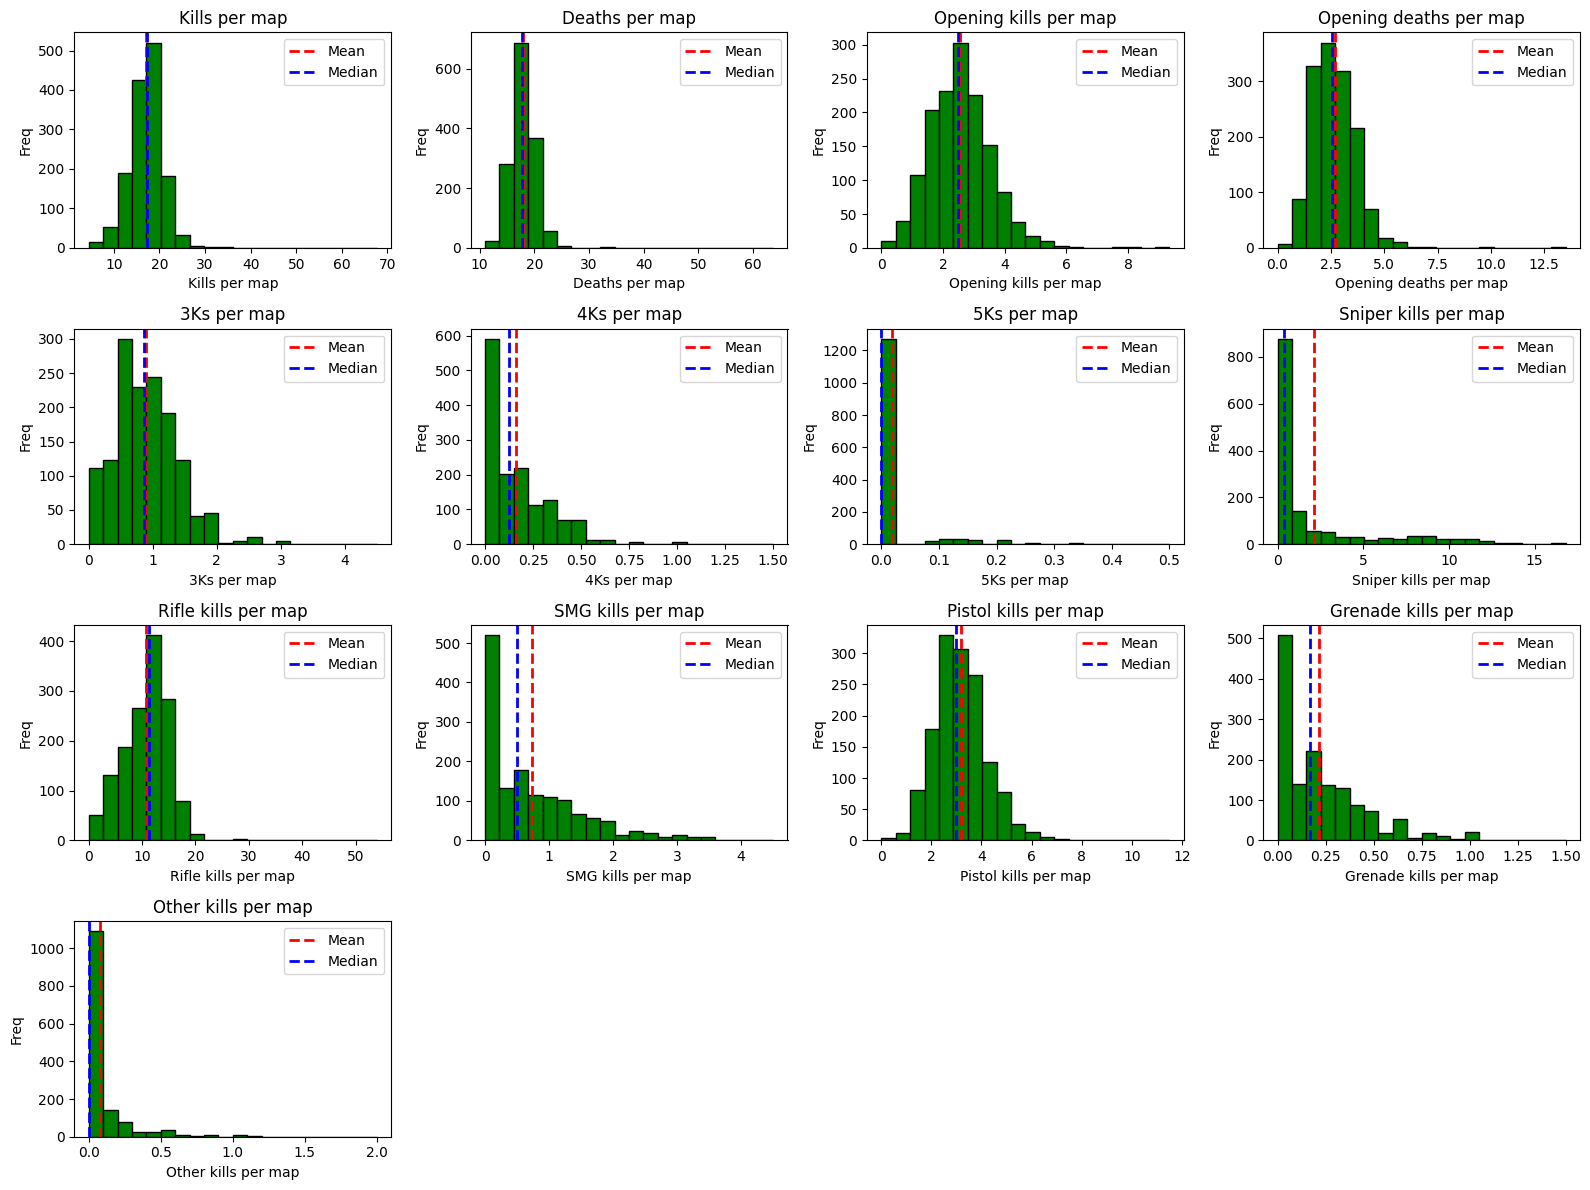

In [7]:

plt.figure(figsize=(16, 12))

# Crea un histograma para cada variable
for i, var in enumerate(new_columns):
    plt.subplot(4, 4, i + 1)  # 4 filas y 4 columnas de gráficos
    plt.hist(df[var], bins=20, color='green', edgecolor='black')  # Puedes ajustar el número de bins
    plt.title(var)
    plt.xlabel(var)
    plt.ylabel('Freq')

    # Calcula la media y la mediana de la variable actual
    mean = df[var].mean()
    median = df[var].median()

    # Dibuja líneas verticales para marcar la media y la mediana
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median, color='blue', linestyle='dashed', linewidth=2, label='Median')
    
    # Añade una leyenda
    plt.legend()

plt.tight_layout()
plt.show()

In [13]:
use_median = ['4Ks per map', '5Ks per map', 'Sniper kills per map', 'SMG kills per map', 'Grenade kills per map', 'Other kills per map']
for col in new_columns:
    if col in use_median:
        print(f"{col} = {df[col].median()}")
    else:
        print(f"{col} = {df[col].mean()}")


Kills per map = 17.098291729026716
Deaths per map = 17.996902759717006
Opening kills per map = 2.537111003521618
Opening deaths per map = 2.6787048641535374
3Ks per map = 0.8957204893570117
4Ks per map = 0.125
5Ks per map = 0.0
Sniper kills per map = 0.4
Rifle kills per map = 10.799920404703924
SMG kills per map = 0.5
Pistol kills per map = 3.1725119619672695
Grenade kills per map = 0.16666666666666666
Other kills per map = 0.0


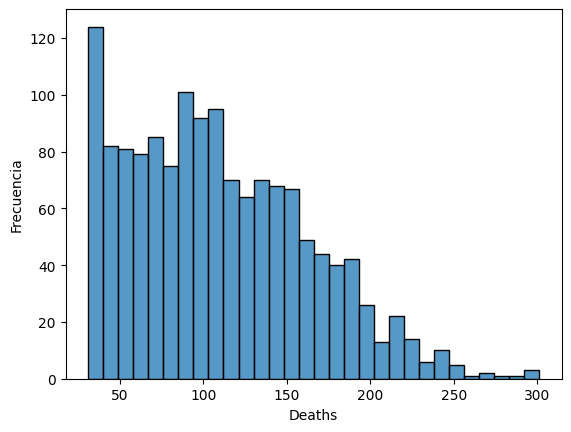

In [9]:
sns.histplot(data=df, x='Deaths', bins=30)
plt.xlabel('Deaths')
plt.ylabel('Frecuencia')
plt.show()

In [10]:
# Calcula las Kills por mapa dividiendo las Kills totales entre la cantidad de mapas
df['Kills_por_mapa'] = df['Kills'] / df['maps']

# Agrupa por mapa y calcula la media y la mediana de las Kills por mapa
media_por_mapa = df.groupby('maps')['Kills_por_mapa'].mean()
mediana_por_mapa = df.groupby('maps')['Kills_por_mapa'].median()

# Ahora tienes la media y la mediana de Kills por mapa
print(media_por_mapa)
print(mediana_por_mapa)

maps
2     14.893443
3     15.979296
4     16.084967
5     17.278974
6     17.509592
7     18.038027
8     17.876437
9     18.280036
10    18.506604
11    18.111888
12    17.997126
13    18.754274
14    17.012987
16    17.637500
Name: Kills_por_mapa, dtype: float64
maps
2     14.500000
3     15.666667
4     15.750000
5     17.400000
6     17.500000
7     18.428571
8     17.875000
9     18.111111
10    18.400000
11    18.272727
12    17.500000
13    18.500000
14    17.142857
16    17.687500
Name: Kills_por_mapa, dtype: float64


Here concludes this part of the analysis and data collection, the rest was done in tableau. You can check the finished Dashboard here: https://public.tableau.com/app/profile/luis2877/viz/CSGO-Majors-Stats_16939594005680/CSGOMajorstats?publish=yes

For more, check limlauer.github.io

Thanks!